In [1]:
import pandas as pd
import numpy as np
import os,sys
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import gc

import matplotlib.pyplot as plt
import seaborn as sns

import random
from collections import Counter, defaultdict
from tqdm import tqdm

In [2]:
path = os.getcwd()
files = glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2014*","*csv"))
files.extend(glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2015*","*csv")))
files.extend(glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2016*","*csv")))
train = pd.DataFrame()
for f in files:
    try:
        if train.empty:
            train = pd.read_csv(f)
        else:
            train = pd.concat([train,pd.read_csv(f)])
    except Exception as e:
        print (f"Error reading {f}. Message is: {e}")

Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20140101-20141231\beijing_all_20141231.csv. Message is: Error tokenizing data. C error: Expected 3 fields in line 34, saw 5

Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_all_20161230.csv. Message is: No columns to parse from file
Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_all_20161231.csv. Message is: No columns to parse from file
Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_extra_20161230.csv. Message is: No columns to parse from file
Error reading C:\Users\Yao\Radix_assignment\takehome\takehome\data\beijing_20160101-20161231\beijing_extra_20161231.csv. Message is: No columns to parse from file


In [3]:
files = glob.glob(os.path.join(path,"takehome","takehome","data","beijing_2017*","*csv"))
test = pd.DataFrame()
for f in files:
    try:
        if test.empty:
            test = pd.read_csv(f)
        else:
            test = pd.concat([test,pd.read_csv(f)])
    except Exception as e:
        print (f"Error reading {f}. Message is: {e}")

In [4]:
train = train[~((train['type']=='PM2.5')&(train['门头沟']>2000))]

In [5]:
train.head()

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,20140101,0,PM2.5,35.0,32.0,45.0,66.0,20.0,31.0,57.0,...,NaN,21.0,110.0,90.0,136.0,75.0,66.0,35.0,84.0,45.0
1,20140101,0,PM2.5_24h,53.0,50.0,53.0,59.0,51.0,51.0,65.0,...,NaN,53.0,112.0,143.0,148.0,74.0,62.0,50.0,68.0,43.0
2,20140101,0,PM10,114.0,110.0,151.0,175.0,90.0,117.0,152.0,...,NaN,53.0,169.0,92.0,323.0,147.0,182.0,112.0,175.0,172.0
3,20140101,0,PM10_24h,131.0,124.0,147.0,151.0,221.0,153.0,174.0,...,NaN,128.0,199.0,120.0,290.0,NaN,150.0,131.0,128.0,158.0
4,20140101,0,AQI,91.0,87.0,99.0,101.0,136.0,102.0,112.0,...,61.0,89.0,146.0,190.0,197.0,99.0,100.0,91.0,92.0,104.0


In [6]:
def preprocess(df):
    #convert date and hour columns into a Datetime index
    df['Datetime'] = pd.to_datetime(df['date'],format='%Y%m%d')+pd.to_timedelta(df['hour'].astype(int), unit='H')
    df = df.set_index('Datetime')
    df = df.drop(columns=['date','hour'])
    #remove AQI and all pollutants with suffix '_24h'
    pollutant = set(df.type)
    pollutant.remove('AQI')
    pollutant = [p for p in pollutant if '24h' not in p]
    df = df.loc[df['type'].isin(pollutant)]
    return df

In [7]:
train = preprocess(train)
test = preprocess(test)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146880 entries, 2014-01-01 00:00:00 to 2016-12-29 09:00:00
Data columns (total 36 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   type    146880 non-null  object 
 1   东四      134527 non-null  float64
 2   天坛      133565 non-null  float64
 3   官园      135557 non-null  float64
 4   万寿西宫    135035 non-null  float64
 5   奥体中心    132132 non-null  float64
 6   农展馆     135106 non-null  float64
 7   万柳      134594 non-null  float64
 8   北部新区    131746 non-null  float64
 9   植物园     131259 non-null  float64
 10  丰台花园    135045 non-null  float64
 11  云岗      136548 non-null  float64
 12  古城      136674 non-null  float64
 13  房山      133362 non-null  float64
 14  大兴      134456 non-null  float64
 15  亦庄      133122 non-null  float64
 16  通州      133870 non-null  float64
 17  顺义      130707 non-null  float64
 18  昌平      135748 non-null  float64
 19  门头沟     135768 non-null  float64
 20  平谷      133371

In [9]:
subset = train.loc[:,['type','万柳']]
subset = subset.pivot_table(values='万柳', index=[subset.index], columns='type').rename_axis(None,axis=1).reset_index().set_index('Datetime')

In [10]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25505 entries, 2014-01-01 00:00:00 to 2016-12-29 09:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO      23247 non-null  float64
 1   NO2     22633 non-null  float64
 2   O3      22800 non-null  float64
 3   PM10    17541 non-null  float64
 4   PM2.5   25305 non-null  float64
 5   SO2     23068 non-null  float64
dtypes: float64(6)
memory usage: 1.4 MB


In [11]:
subset = subset.asfreq('h')

In [13]:
subset.head()

,CO,NO2,O3,PM10,PM2.5,SO2
Datetime,,,,,,
2014-01-01 00:00:00,NaN,NaN,NaN,152.0,57.0,NaN
2014-01-01 01:00:00,NaN,NaN,NaN,179.0,68.0,NaN
2014-01-01 02:00:00,NaN,NaN,NaN,240.0,81.0,NaN
2014-01-01 03:00:00,NaN,NaN,NaN,229.0,95.0,NaN
2014-01-01 04:00:00,NaN,NaN,NaN,206.0,95.0,NaN


In [939]:
def process_one_location(df, location, take_log=True, take_diff=True, n_lag=3):
    subset = df.loc[:,['type',location]]
    subset.sort_values(by = ['Datetime'])
    subset = subset.pivot_table(values=location, index=[df.index], columns='type').rename_axis(None,axis=1).reset_index().set_index('Datetime')

    subset_augmented = subset.asfreq('h')
#     subset_augmented = subset_augmented.interpolate(method = 'linear')

#     subset_augmented = subset_augmented.dropna()
    
#     if take_log:
#         subset_augmented = subset_augmented.apply(lambda x: np.log(x))
    if take_log:
        subset_augmented['PM2.5'] = subset_augmented['PM2.5'].map(lambda x: np.log(x))
        
    subset_augmented = feature_engineering(subset_augmented,n_lag,take_diff)
    
#     subset_augmented =  subset_augmented.dropna()
    subset_augmented['location'] = location
    true_y =  subset_augmented[["PM2.5",'location']]
    
    if take_diff:
        subset_augmented['target'] = subset_augmented['PM2.5_diff']
        subset_augmented = subset_augmented.drop(columns=['PM2.5_diff','PM10_diff','SO2_diff','CO_diff','NO2_diff','O3_diff','PM2.5','PM10','SO2','CO','NO2','O3'])
    else:
        subset_augmented['target'] = subset_augmented['PM2.5']
        subset_augmented = subset_augmented.drop(columns=['PM2.5','PM10','SO2','CO','NO2','O3'])
    
    return subset_augmented, true_y
    
def feature_engineering(subset_augmented, n_lag, take_diff=True):
    if take_diff:
        subset_augmented["PM2.5_diff"] = subset_augmented["PM2.5"]-subset_augmented["PM2.5"].shift(1)
        subset_augmented["PM10_diff"] = subset_augmented["PM10"]-subset_augmented["PM10"].shift(1)
        subset_augmented["SO2_diff"] = subset_augmented["SO2"]-subset_augmented["SO2"].shift(24)
#         subset_augmented["SO2_diff"] = subset_augmented["SO2"]-subset_augmented["SO2"].shift(1)
        subset_augmented["CO_diff"] = subset_augmented["CO"]-subset_augmented["CO"].shift(24)
#         subset_augmented["CO_diff"] = subset_augmented["CO"]-subset_augmented["CO"].shift(1)
        subset_augmented["NO2_diff"] = subset_augmented["NO2"]-subset_augmented["NO2"].shift(24)
#         subset_augmented["NO2_diff"] = subset_augmented["NO2"]-subset_augmented["NO2"].shift(1)
        subset_augmented["O3_diff"] = subset_augmented["O3"]-subset_augmented["O3"].shift(24)
#         subset_augmented["O3_diff"] = subset_augmented["O3"]-subset_augmented["O3"].shift(1)
    
    subset_augmented = create_lag(n_lag,subset_augmented,take_diff)
    
    subset_augmented = calculate_rolling_stat(subset_augmented,take_diff)
    
    return subset_augmented
        
def create_lag(n_lag, subset_augmented,take_diff=True):
    if take_diff:
        col = ['PM2.5_diff','PM10_diff','SO2_diff','CO_diff','NO2_diff','O3_diff']
    else:
        col = ['PM2.5','PM10','SO2','CO','NO2','O3']
    for lag in range(1,n_lag+1):
        tmp = subset_augmented[col].shift(lag)
        tmp.columns=[f'{c}_lag_{lag}' for c in col]
        subset_augmented = pd.concat([subset_augmented,tmp],axis=1)
        
    return subset_augmented

def calculate_rolling_stat(res,take_diff=True):
    if take_diff:
        col = ['PM2.5_diff','PM10_diff','SO2_diff','CO_diff','NO2_diff','O3_diff']
    else:
        col = ['PM2.5','PM10','SO2','CO','NO2','O3']
    for p in col:
        res[f'{p}_daily_mean'] = res[p].rolling(24,min_periods=1).mean()
        res[f'{p}_daily_median'] = res[p].rolling(24,min_periods=1).median()
        res[f'{p}_daily_std'] = res[p].rolling(24,min_periods=1).std()
        res[f'{p}_weekly_mean'] = res[p].rolling(24*7,min_periods=1).mean()
        res[f'{p}_weekly_median'] = res[p].rolling(24*7,min_periods=1).median()
        res[f'{p}_weekly_std'] = res[p].rolling(24*7,min_periods=1).std()
        res[f'{p}_monthly_mean'] = res[p].rolling(24*30,min_periods=1).mean()
        res[f'{p}_monthly_median'] = res[p].rolling(24*30,min_periods=1).median()
        res[f'{p}_monthly_std'] = res[p].rolling(24*30,min_periods=1).std()
    return res

In [1014]:
IS_TAKING_LOG=False
IS_TAKING_DIFF=True

In [1015]:
subset,true_y = process_one_location(train,'官园',take_log=IS_TAKING_LOG, take_diff=IS_TAKING_DIFF)
true_y['PM2.5_y'] = true_y['PM2.5'].shift(1) 
subset.drop(columns=['location'],inplace=True) #location will be used later

In [1016]:
if IS_TAKING_DIFF:
    subset = subset.drop(columns=['PM10_diff_lag_1','PM10_diff_lag_2','PM10_diff_lag_3'])
else:
    subset = subset.drop(columns=['PM10_lag_1','PM10_lag_2','PM10_lag_3'])

In [1017]:
subset = subset[subset.index>'2014-04-03']   #starting from April 3rd for complete data
true_y = true_y[true_y.index>'2014-04-03']   #starting from April 3rd for complete data

In [1018]:
#subset = subset.dropna()
# subset = subset[subset['target'].notna()]
# true_y = true_y[true_y['PM2.5'].notna()]

train_notna_index = subset['target'].notna()
subset = subset[train_notna_index]
true_y = true_y[train_notna_index]

In [1019]:
#In order to calcualte rolling window statistics, we append the last month data from training dataset to our test dataset.
test_new = pd.concat([train.iloc[train.index>'2016-12-01'],test])

In [1020]:
testing,testing_y = process_one_location(test_new,'官园',take_log=IS_TAKING_LOG, take_diff=IS_TAKING_DIFF)
testing_y['PM2.5_y'] = testing_y['PM2.5'].shift(1) 
testing.drop(columns=['location'],inplace=True) #location will be used later

In [1021]:
if IS_TAKING_DIFF:
    testing = testing.drop(columns=['PM10_diff_lag_1','PM10_diff_lag_2','PM10_diff_lag_3'])
else:
    testing = testing.drop(columns=['PM10_lag_1','PM10_lag_2','PM10_lag_3'])

In [1022]:
testing = testing[testing.index>='2017-01-01']
testing_y = testing_y[testing_y.index>='2017-01-01']

In [1023]:
#testing = testing.dropna()
# testing = testing[testing['target'].notna()]
# testing_y = testing_y[testing_y['PM2.5'].notna()]
test_notna_index=testing['target'].notna()
testing = testing[test_notna_index]
testing_y = testing_y[test_notna_index]

In [1024]:
testing

,PM2.5_diff_lag_1,SO2_diff_lag_1,CO_diff_lag_1,NO2_diff_lag_1,O3_diff_lag_1,PM2.5_diff_lag_2,SO2_diff_lag_2,CO_diff_lag_2,NO2_diff_lag_2,O3_diff_lag_2,...,O3_diff_daily_mean,O3_diff_daily_median,O3_diff_daily_std,O3_diff_weekly_mean,O3_diff_weekly_median,O3_diff_weekly_std,O3_diff_monthly_mean,O3_diff_monthly_median,O3_diff_monthly_std,target
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.119403,1.0,13.594253,0.828423,0.0,20.288202,24.0
2017-01-02 00:00:00,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.151515,1.0,13.695864,0.829861,0.0,20.305807,0.0
2017-01-02 01:00:00,0.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.151515,1.0,13.695864,0.831304,0.0,20.323457,-20.0
2017-01-02 02:00:00,-20.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.151515,1.0,13.695864,0.832753,0.0,20.341154,-45.0
2017-01-02 03:00:00,-45.0,NaN,NaN,NaN,NaN,-20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.151515,1.0,13.695864,0.834206,0.0,20.358897,-169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-29 19:00:00,-1.0,0.0,-0.1,-10.0,19.0,-1.0,-1.0,0.0,-13.0,8.0,...,-0.458333,0.0,18.139506,-2.946429,-1.0,25.028214,-2.047273,0.0,35.964635,-2.0
2017-04-29 20:00:00,-2.0,1.0,-0.2,-32.0,47.0,-1.0,0.0,-0.1,-10.0,19.0,...,2.041667,0.0,20.337327,-2.504425,-1.0,25.355376,-1.905455,0.0,36.004024,2.0
2017-04-29 21:00:00,2.0,1.0,0.0,-4.0,47.0,-2.0,1.0,-0.2,-32.0,47.0,...,3.000000,0.0,21.530565,-2.140351,-0.5,25.540486,-1.809091,0.0,36.042501,2.0


In [1025]:
testing_y

,PM2.5,location,PM2.5_y
Datetime,,,
2017-01-01 23:00:00,500.0,官园,476.0
2017-01-02 00:00:00,500.0,官园,500.0
2017-01-02 01:00:00,480.0,官园,500.0
2017-01-02 02:00:00,435.0,官园,480.0
2017-01-02 03:00:00,266.0,官园,435.0
...,...,...,...
2017-04-29 19:00:00,46.0,官园,48.0
2017-04-29 20:00:00,48.0,官园,46.0
2017-04-29 21:00:00,50.0,官园,48.0


In [1026]:
testing_y.isna().sum()

PM2.5       0
location    0
PM2.5_y     0
dtype: int64

In [1027]:
testing.isna().sum()

PM2.5_diff_lag_1           84
SO2_diff_lag_1            273
CO_diff_lag_1             452
NO2_diff_lag_1            274
O3_diff_lag_1             398
                         ... 
O3_diff_weekly_std          0
O3_diff_monthly_mean        0
O3_diff_monthly_median      0
O3_diff_monthly_std         0
target                      0
Length: 70, dtype: int64

In [1028]:
import lightgbm as lgb
seed0=617
lgb_params = {
            'objective': 'regression',
            'subsample': 0.72,
            'subsample_freq': 5,
            'max_depth': -1,
            'learning_rate': 0.1,
            "boosting_type": "gbdt",
            "metric": 'rmse',
            "verbosity": -1,
            'feature_fraction': 0.5,
            'lambda_l1': 5,
            'lambda_l2': 5,
            'random_state': seed0,
            'feature_fraction_seed': seed0,
            'bagging_seed': seed0,
#             'min_data_in_leaf': 50,
#             'max_depth': -1,
#             'num_leaves': 128,
         }

In [1029]:
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1030]:
def train_lgb(data,test,params,n_splits=5):
    #tscv = TimeSeriesSplit(n_splits)
    tscv = KFold(n_splits, shuffle=True)
    
    y_oof = np.zeros(data.shape[0])
    
    test_predictions = np.zeros(test.shape[0])

    feature_importances = pd.DataFrame()
    feature_importances['feature'] = data.columns[:-1]
    mean_score = []
    
    for fold_n, (train_index, valid_index) in enumerate(tscv.split(data)):
        print(f'Fold: {fold_n+1}')
        X_train, X_valid = data.iloc[train_index].loc[:,data.columns!="target"],data.iloc[valid_index].loc[:,data.columns!="target"]
        y_train, y_valid = data.iloc[train_index].loc[:,"target"], data.iloc[valid_index].loc[:,"target"]

        dtrain = lgb.Dataset(X_train, label=y_train)
        dvalid = lgb.Dataset(X_valid, label=y_valid)

        clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid],early_stopping_rounds = 50, verbose_eval=500)

        feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
        y_pred_valid = clf.predict(X_valid,num_iteration=clf.best_iteration)
        y_oof[valid_index] = y_pred_valid
        
        #Predict the test set       
        test_predictions += clf.predict(test.loc[:,data.columns!="target"],num_iteration=clf.best_iteration) / n_splits

        val_score = np.sqrt(mean_squared_error(y_pred_valid, y_valid))
        print(f'val rmse score is {val_score}')
        mean_score.append(val_score)

        del X_train, X_valid, y_train, y_valid
        gc.collect()

    print(f'mean rmse score over folds is {np.mean(mean_score)}')
    
    return y_oof, feature_importances,test_predictions

def process_prediction(predicted, true_y, take_log=True, take_diff=True):
    true_y['predicted'] = predicted
    if take_diff:
        true_y['prediction'] = true_y['predicted'] + true_y['PM2.5_y']
    else:
        true_y['prediction'] = true_y['predicted']
        
    true_y['prediction'] = true_y['prediction'].map(lambda x: max(x,0)) # floor at 0
    true_y['prediction'] = true_y['prediction'].map(lambda x: min(x,1000)) # cap at 1000
    
    if take_log:
        true_y['prediction']=true_y['prediction'].map(lambda x: np.exp(x))
        true_y['PM2.5_y']=true_y['PM2.5_y'].map(lambda x: np.exp(x))
        true_y['PM2.5']=true_y['PM2.5'].map(lambda x: np.exp(x))

    true_y.dropna(inplace=True)

In [1031]:
n_splits = 5
predicted, feature_importances,test_predictions = train_lgb(subset,testing,lgb_params, n_splits)

Fold: 1
Training until validation scores don't improve for 50 rounds
[500]	training's rmse: 6.58718	valid_1's rmse: 14.4808
[1000]	training's rmse: 4.0373	valid_1's rmse: 14.196
[1500]	training's rmse: 2.67581	valid_1's rmse: 14.0828
[2000]	training's rmse: 1.86154	valid_1's rmse: 14.0033
[2500]	training's rmse: 1.34356	valid_1's rmse: 13.9555
Early stopping, best iteration is:
[2774]	training's rmse: 1.14023	valid_1's rmse: 13.9275
val rmse score is 13.927499595372968
Fold: 2
Training until validation scores don't improve for 50 rounds
[500]	training's rmse: 6.52944	valid_1's rmse: 15.7207
[1000]	training's rmse: 3.99657	valid_1's rmse: 15.4775
[1500]	training's rmse: 2.65411	valid_1's rmse: 15.3497
[2000]	training's rmse: 1.84423	valid_1's rmse: 15.2583
[2500]	training's rmse: 1.32987	valid_1's rmse: 15.2036
[3000]	training's rmse: 0.993625	valid_1's rmse: 15.1662
[3500]	training's rmse: 0.764042	valid_1's rmse: 15.1423
[4000]	training's rmse: 0.604689	valid_1's rmse: 15.1253
[4500]	

Text(0.5, 1.0, '20 TOP feature importance over 5 folds average')

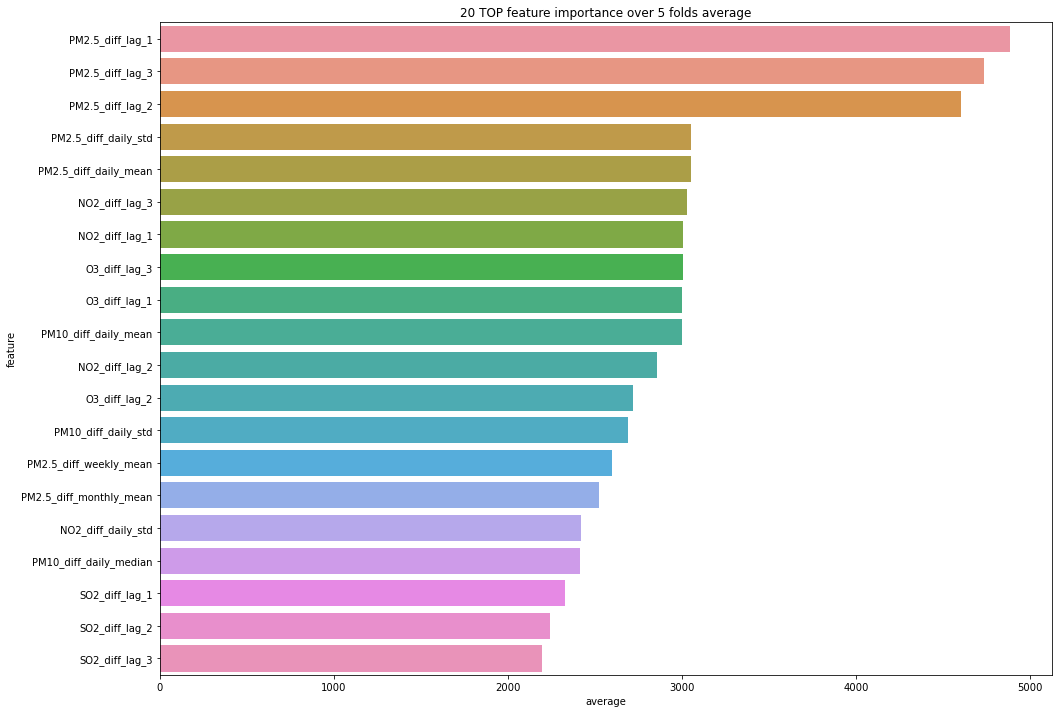

In [1032]:
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(n_splits)]].mean(axis=1)
plt.figure(figsize=(16, 12))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(20), x='average', y='feature')
plt.title('20 TOP feature importance over {} folds average'.format(n_splits))

In [1033]:
process_prediction(predicted,true_y,take_log=IS_TAKING_LOG,take_diff=IS_TAKING_DIFF)
process_prediction(test_predictions,testing_y,take_log=IS_TAKING_LOG,take_diff=IS_TAKING_DIFF)

In [1034]:
print(f'In sample RMSE for LightGBM method is {np.sqrt(mean_squared_error(true_y["prediction"],true_y["PM2.5"]))}')
print(f'Out of sample RMSE for LightGBM method is {np.sqrt(mean_squared_error(testing_y["prediction"],testing_y["PM2.5"]))}')

In sample RMSE for LightGBM method is 14.283042847591046
Out of sample RMSE for LightGBM method is 20.438921786398165


In [1035]:
testing_y

,PM2.5,location,PM2.5_y,predicted,prediction
Datetime,,,,,
2017-01-01 23:00:00,500.0,官园,476.0,52.949230,528.949230
2017-01-02 00:00:00,500.0,官园,500.0,29.695966,529.695966
2017-01-02 01:00:00,480.0,官园,500.0,-8.888810,491.111190
2017-01-02 02:00:00,435.0,官园,480.0,-32.868180,447.131820
2017-01-02 03:00:00,266.0,官园,435.0,-38.182272,396.817728
...,...,...,...,...,...
2017-04-29 19:00:00,46.0,官园,48.0,6.475761,54.475761
2017-04-29 20:00:00,48.0,官园,46.0,6.837229,52.837229
2017-04-29 21:00:00,50.0,官园,48.0,5.356708,53.356708


In [1036]:
print(f'In sample RMSE for Naive method is {np.sqrt(mean_squared_error(true_y["PM2.5_y"],true_y["PM2.5"]))}')
print(f'Out of sample RMSE for Naive method is {np.sqrt(mean_squared_error(testing_y["PM2.5_y"],testing_y["PM2.5"]))}')

In sample RMSE for Naive method is 17.688118261851102
Out of sample RMSE for Naive method is 20.261702171113665


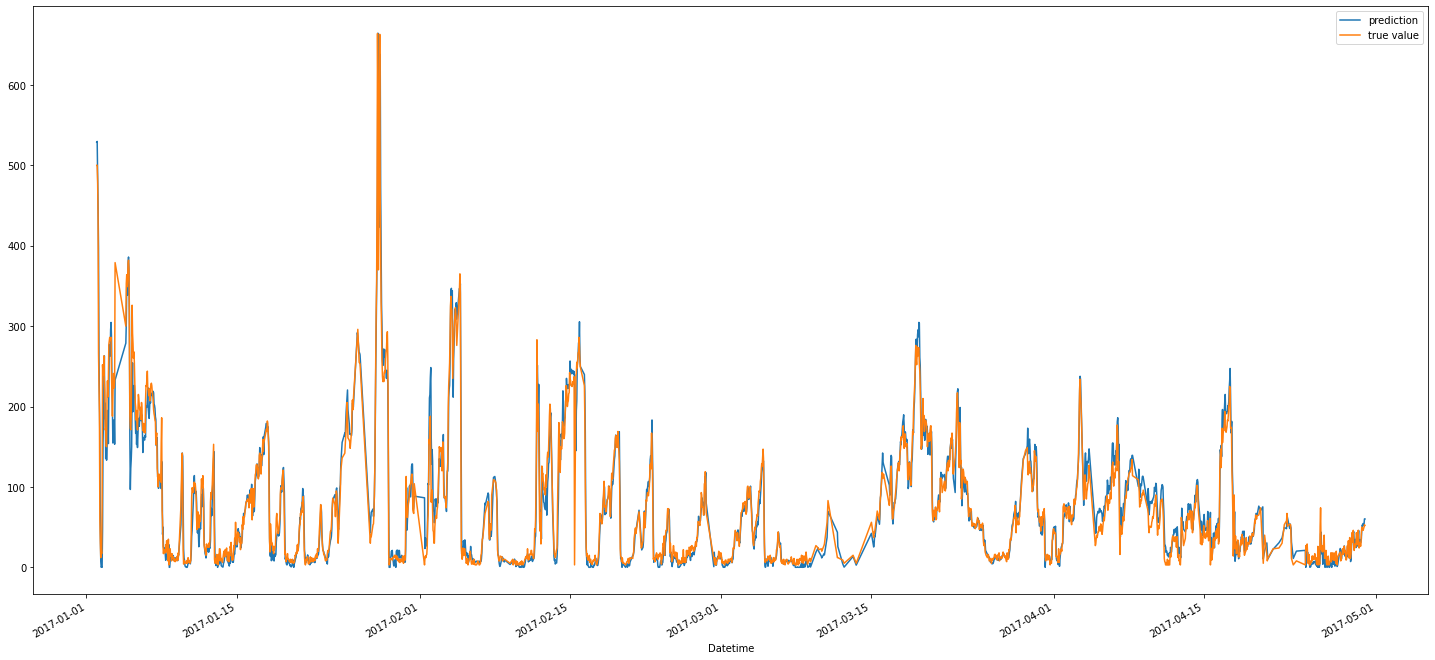

In [1038]:
plt.figure(figsize=(25, 12))
testing_y["prediction"].plot(label='prediction')
testing_y["PM2.5"].plot(label='true value')
plt.legend()
plt.show()

In [1040]:
testing_y

,PM2.5,location,PM2.5_y,predicted,prediction
Datetime,,,,,
2017-01-01 23:00:00,500.0,官园,476.0,52.949230,528.949230
2017-01-02 00:00:00,500.0,官园,500.0,29.695966,529.695966
2017-01-02 01:00:00,480.0,官园,500.0,-8.888810,491.111190
2017-01-02 02:00:00,435.0,官园,480.0,-32.868180,447.131820
2017-01-02 03:00:00,266.0,官园,435.0,-38.182272,396.817728
...,...,...,...,...,...
2017-04-29 19:00:00,46.0,官园,48.0,6.475761,54.475761
2017-04-29 20:00:00,48.0,官园,46.0,6.837229,52.837229
2017-04-29 21:00:00,50.0,官园,48.0,5.356708,53.356708
